# Overfitting and Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

## Introduction

### What is Overfitting?

- Overfitting happens when a machine learning model performs well on training data but poorly on unseen test data.
  This usually occurs when the model learns noise and details in the training data that don’t generalize to new data.

### Why Overfitting Occurs?

- When a model is too complex (e.g. has too many parameters relative to the number of training samples), it can "memorize" the training data.

### What is Regularization?

- Regularization is a technique used to reduce the model’s complexity by adding a penalty to the model's parameters. This helps the model generalize better to unseen data.

## Mathematical Explanation

### Overfitting in Terms of Error

$$Total Error=Bias Error+Variance Error$$

Overfitting occurs when the model's variance is too high.

_**Variance**_ refers to how much a model's predictions change when it is trained on different subsets of the training data.

_High variance means that the model is very sensitive to the specific data points it was trained on, leading it to fit the training data too closely, including the noise and random fluctuations, rather than capturing the underlying general patterns._

_Model with too low variance might be too simple (underfitting), failing to capture the complexities of the data._

### Regularization

#### Two main types of regularization

- **L1 Regularization (Lasso)**: Adds an absolute value penalty to the cost function

$$Cost Function = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \lvert \theta_j \rvert$$

- **L2 Regularization (Ridge)**: Adds a squared penalty to the cost function.

$$Cost Function = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \theta_j^2 $$

- **Why This Helps**: These penalties prevent the model from learning large weights, which reduces complexity and helps the model generalize.

_**L** Comes from Lebesgue normwhich is a standard way to measure the size or length of vectors in mathematics._

_The "1" and "2" denote the type of norm being used:_
- _**L1** norm corresponds to the sum of absolute values (making it a "Manhattan" norm)._
- _**L2** norm corresponds to the sum of squared values (making it an "Euclidean" norm)._

- _L1 (Lasso) can lead to sparse models (with some coefficients exactly zero)._
- _L2 (Ridge) results in a more evenly distributed shrinkage of coefficients._

### Dataset and Model Setup

- Generating data

In [2]:
np.random.seed(0)
X = np.random.rand(150, 1) * 10
y = 2 * X + 3 + np.random.randn(150, 1) * 2

- Split into training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

- Polynomial features

In [4]:
poly = PolynomialFeatures(degree=10) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

- Training a simple linear regression model

In [5]:
model = LinearRegression()
model.fit(X_train_poly, y_train);

### Overfitting Visualization

- Visualizing the overfitted model by plotting the training and test data, along with the model’s predictions

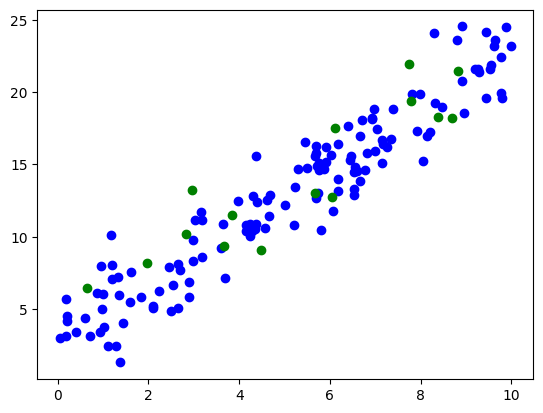

In [6]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

In [7]:
# Predictions
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)

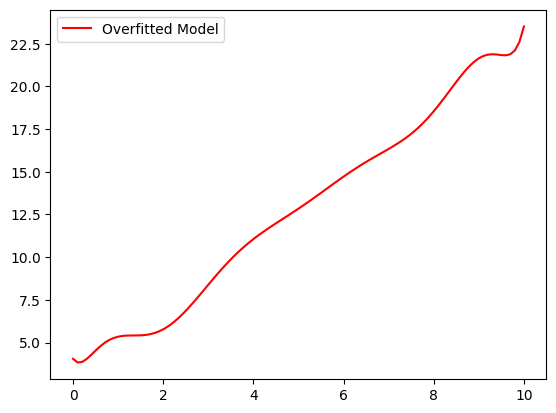

In [8]:
plt.plot(X_line, y_line, color='red', label='Overfitted Model')
plt.legend()
plt.show()

### Regularization Implementation (Lasso and Ridge)

- Implementing **L1 (Lasso)** and **L2 (Ridge)** regularization using `sklearn`.

In [9]:
# L2 Regularization (Ridge)
ridge_model = Ridge(alpha=2)
ridge_model.fit(X_train_poly, y_train);

C:\Users\petar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.95335e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [10]:
# L1 Regularization (Lasso)
lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_train_poly, y_train);

C:\Users\petar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+02, tolerance: 4.681e-01
  model = cd_fast.enet_coordinate_descent(


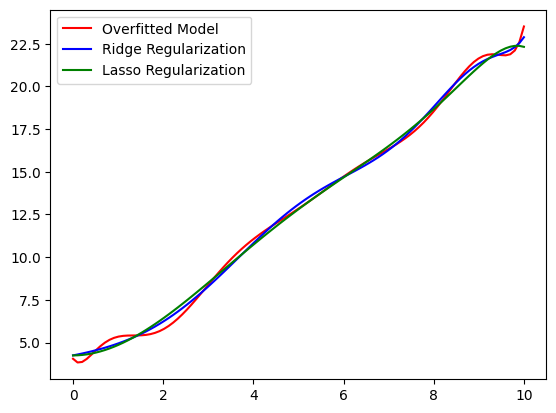

In [11]:
# Plotting the regularized models
y_ridge = ridge_model.predict(X_line_poly)
y_lasso = lasso_model.predict(X_line_poly)

plt.plot(X_line, y_line, color='red', label='Overfitted Model')
plt.plot(X_line, y_ridge, color='blue', label='Ridge Regularization')
plt.plot(X_line, y_lasso, color='green', label='Lasso Regularization')
plt.legend()
plt.show()

### Comparison and Explanation

#### Training and Test Error with and without Regularization
- To compare how the training error and test error change with and without regularization, we can calculate the Mean Squared Error (MSE) on both the training and test sets for three models:
    - Overfitted Model (No Regularization)
    - Ridge Regularization (L2)
    - Lasso Regularization (L1)

In [12]:
# Predictions for training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

y_train_ridge_pred = ridge_model.predict(X_train_poly)
y_test_ridge_pred = ridge_model.predict(X_test_poly)

y_train_lasso_pred = lasso_model.predict(X_train_poly)
y_test_lasso_pred = lasso_model.predict(X_test_poly)

In [13]:
# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train_ridge = mean_squared_error(y_train, y_train_ridge_pred)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge_pred)

mse_train_lasso = mean_squared_error(y_train, y_train_lasso_pred)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso_pred)

In [14]:
# Displaying the results
print(f'Overfitted Model: Training MSE = {mse_train:.2f}, Test MSE = {mse_test:.2f}')
print(f'Ridge Regularization: Training MSE = {mse_train_ridge:.2f}, Test MSE = {mse_test_ridge:.2f}')
print(f'Lasso Regularization: Training MSE = {mse_train_lasso:.2f}, Test MSE = {mse_test_lasso:.2f}')

Overfitted Model: Training MSE = 3.02, Test MSE = 5.97
Ridge Regularization: Training MSE = 3.07, Test MSE = 5.74
Lasso Regularization: Training MSE = 3.11, Test MSE = 5.26


#### Explanation of the output

##### 1. Overfitted model
- The training MSE is lower because the model has memorized the training data.
- The test MSE is higher, indicating that the model does not generalize well to unseen data.

##### 2. Ridge Regularization (L2):

- The training MSE might increase slightly compared to the overfitted model because Ridge penalizes large coefficients, preventing the model from fitting the training data too closely.
- The test MSE should decrease significantly, indicating better generalization.

##### 3. Lasso Regularization (L1):

- The training MSE is slightly higher than the Ridge model, as Lasso also shrinks coefficients and can set some to zero, effectively selecting features.
- The test MSE also decreased, even more than Ridge, but of course it depends on the dataset and model. In our case it decreased a by a lot, indicating better generalization.

## Visual Explanation of Bias-Variance Tradeoff
The bias-variance tradeoff can be visualized as follows:

- A model with high bias (underfitting) will have high training and test error.
- A model with high variance (overfitting) will have low training error but high test error.

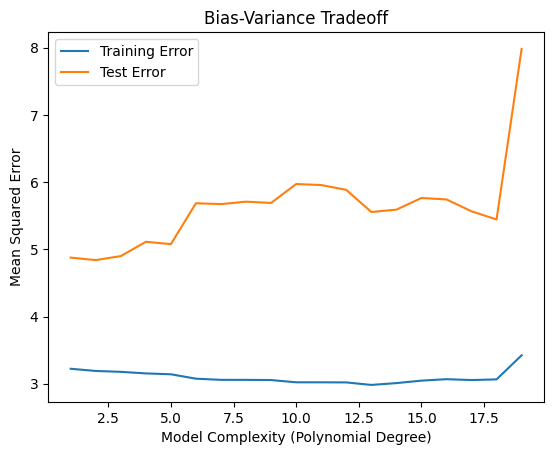

In [15]:
degrees = np.arange(1, 20)
train_errors, test_errors = [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

## Types of Regularization Beyond L1 and L2

- Elastic Net Regularization
    - **Elastic Net** combines both L1 and L2 regularization. It includes both penalties to balance sparsity and generalization.
$$Cost Function = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} \lvert \theta_j \rvert + \lambda_2 \sum_{j=1}^{p} \theta_j^2$$


C:\Users\petar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.148e+02, tolerance: 4.681e-01
  model = cd_fast.enet_coordinate_descent(


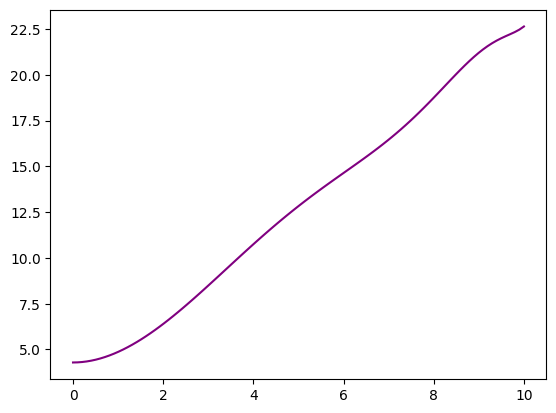

In [23]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)  # l1_ratio balances L1 and L2
elastic_net_model.fit(X_train_poly, y_train)

X_line_poly = poly.transform(X_line)
y_elastic_net = elastic_net_model.predict(X_line_poly)

plt.plot(X_line, y_elastic_net, color='purple', label='Elastic Net Regularization')

y_train_elastic_net_pred = elastic_net_model.predict(X_train_poly)
y_test_elastic_net_pred = elastic_net_model.predict(X_test_poly)

mse_train_elastic_net = mean_squared_error(y_train, y_train_elastic_net_pred)
mse_test_elastic_net = mean_squared_error(y_test, y_test_elastic_net_pred)

In [24]:
print(f'Overfitted Model: Training MSE = {mse_train:.2f}, Test MSE = {mse_test:.2f}')
print(f'Ridge Regularization: Training MSE = {mse_train_ridge:.2f}, Test MSE = {mse_test_ridge:.2f}')
print(f'Lasso Regularization: Training MSE = {mse_train_lasso:.2f}, Test MSE = {mse_test_lasso:.2f}')
print(f'Elastic Net Regularization: Training MSE = {mse_train_elastic_net:.2f}, Test MSE = {mse_test_elastic_net:.2f}')

Overfitted Model: Training MSE = 3.02, Test MSE = 5.97
Ridge Regularization: Training MSE = 3.07, Test MSE = 5.74
Lasso Regularization: Training MSE = 3.11, Test MSE = 5.26
Elastic Net Regularization: Training MSE = 3.10, Test MSE = 5.31


## Conclusion

### Why Regularization Improves Model Performance

- **Overfitting** occurs when a model is too complex relative to the amount of data it has, leading to a situation where the model performs extremely well on the training data but poorly on unseen test data. This is evident from the high test MSE in the overfitted model.

- **Regularization** techniques, like **_Ridge_** and **_Lasso_**, add a penalty term to the cost function, which discourages the model from assigning too much importance to any one feature. This is crucial because large coefficients can lead to a model that fits the noise in the training data rather than the underlying trend.

- **Ridge Regularization (L2)** penalizes the sum of the squared coefficients. This has the effect of shrinking all coefficients, making the model less sensitive to small variations in the training data, and thus improving its generalization to unseen data.

- **Lasso Regularization (L1)** penalizes the sum of the absolute values of the coefficients. This not only shrinks coefficients but can also set some of them to zero, effectively performing feature selection. This can lead to a simpler, more interpretable model that avoids overfitting.

- **Improved Generalization**:
    - By controlling the complexity of the model, regularization reduces the variance (the model's sensitivity to the training data), leading to lower test MSE.
    - While the training error might slightly increase (since the model is less flexible), the significant reduction in test error demonstrates the model’s improved ability to generalize to new data.

## Practical Considerations

- **Choosing Between L1 (Lasso) and L2 (Ridge) Regularization:**

    - L1 Regularization (Lasso): L1 regularization is typically used when feature selection is important. This is because L1 tends to shrink some coefficients to zero, effectively removing those features from the model. It's useful in situations where you expect that only a subset of the features are relevant to the outcome (e.g., in sparse datasets).

    - L2 Regularization (Ridge): L2 regularization is preferred when you have multicollinearity (i.e., highly correlated features) because it tends to distribute the coefficient shrinkage more evenly. L2 regularization reduces the impact of each feature but doesn't eliminate them entirely, making it suitable when all features might contribute to the outcome to some extent.
 
- Elastic Net: When you need a balance between feature selection and dealing with multicollinearity, Elastic Net (which combines both L1 and L2 regularization) can be a good choice. You can adjust the balance between L1 and L2 using the l1_ratio parameter.

## Regularization in Real-World Applications

- Regularization techniques are widely used in many industries to enhance model performance and ensure generalization:

    - **Finance (Credit Scoring)**: In credit scoring models, regularization can help to prevent overfitting on historical data, leading to better predictions on new applicants. Lasso regularization can also help in identifying the most important factors (e.g., payment history, debt-to-income ratio) that influence credit scores.

    - **Healthcare (Disease Prediction)**: In healthcare, predictive models for disease detection (e.g., predicting the onset of diabetes) can benefit from regularization by avoiding overfitting to particular patient datasets. This ensures that models generalize better across diverse populations.

    - **Image Recognition**: Regularization is critical in deep learning models used for image recognition tasks (e.g., in self-driving cars or facial recognition software). Techniques like L2 regularization (weight decay) are often applied to neural networks to prevent them from overfitting to the training images, ensuring they work well on new images.

## Additional Metrics to Evaluate Model Performance

While Mean Squared Error (MSE) is a common metric for regression problems, there are additional metrics that can provide more insight into model performance:

- **R-squared $(R^2)$**: This metric indicates the proportion of variance in the dependent variable that is predictable from the independent variables. $R^2$ values range from 0 to 1, where a value close to 1 indicates that the model explains most of the variance in the target variable.

In [27]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Training Data = {r2_train:.2f}, Test Data = {r2_test:.2f}')

Training Data = 0.91, Test Data = 0.75


## In summary

- Regularization techniques like L1 and L2 help reducing overfitting by balancing the trade-off between bias and variance, leading to models that perform better on unseen data. This is why we observe a lower test MSE with regularization compared to an overfitted model.